## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Load Clustering Metrics

In [2]:
# Load metrics from all three algorithms
metrics_df = pd.read_csv(
    "/home/samir-dahal/Diabetes_Classification/results/clustering_results/clustering_metrics.csv"
)
metrics_df

,Algorithm,ARI,Silhouette,Davies_Bouldin,NMI,Inertia
0,K-Means,0.555875,0.173068,1.586168,0.436468,6763.990175
1,Hierarchical_Ward,0.545081,0.129967,1.457560,0.329782,NaN
2,Hierarchical_Average,-0.006622,0.660185,0.229455,0.002371,NaN


# Vizualizing Algorithm performance

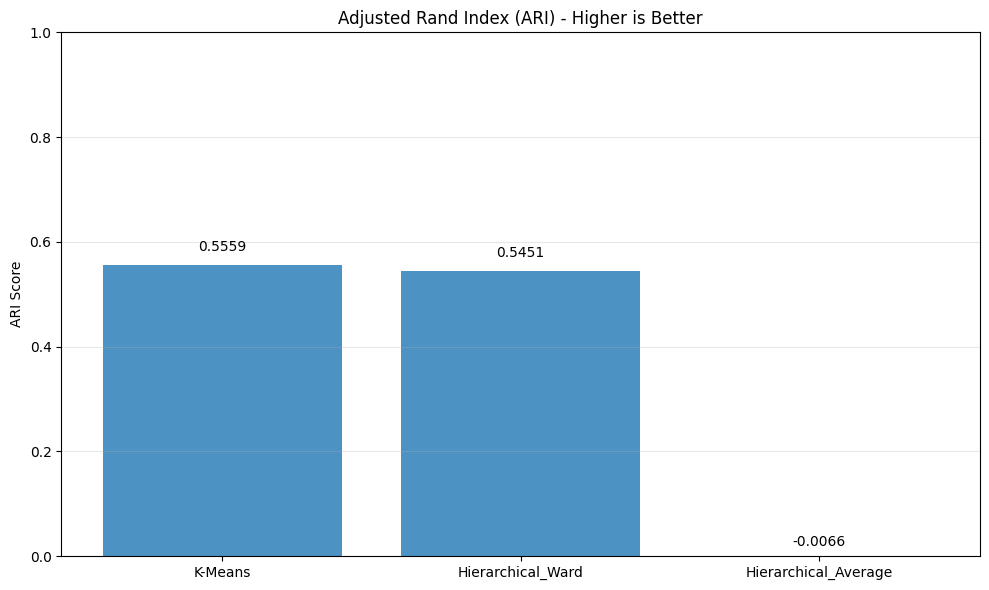

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_df["Algorithm"], metrics_df["ARI"], alpha=0.8)
plt.title("Adjusted Rand Index (ARI) - Higher is Better")
plt.ylabel("ARI Score")
plt.ylim(0, 1)
plt.grid(axis="y", alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.02,
        f"{height:.4f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

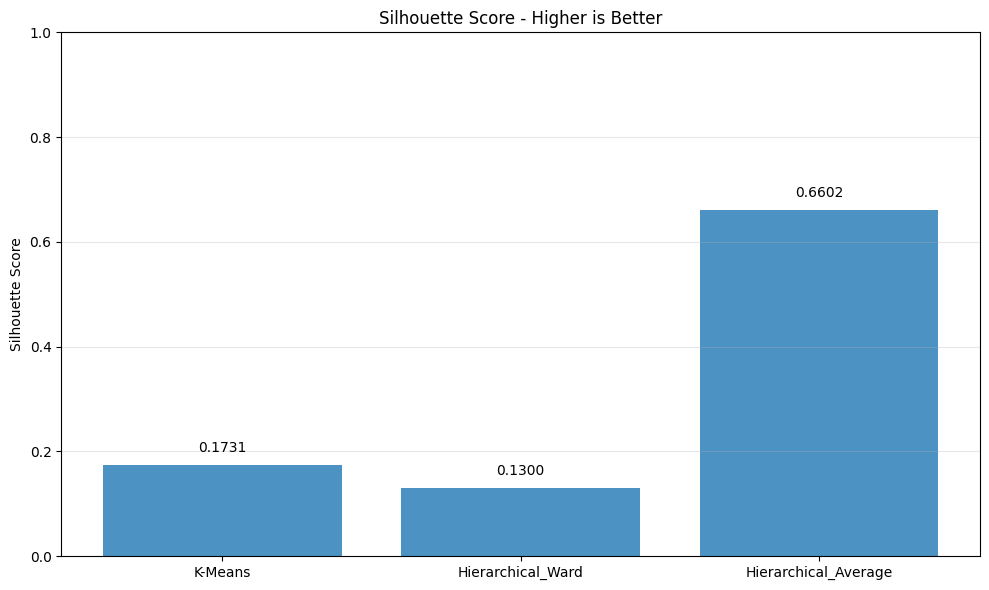

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_df["Algorithm"], metrics_df["Silhouette"], alpha=0.8)
plt.title("Silhouette Score - Higher is Better")
plt.ylabel("Silhouette Score")
plt.ylim(0, 1)
plt.grid(axis="y", alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.02,
        f"{height:.4f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

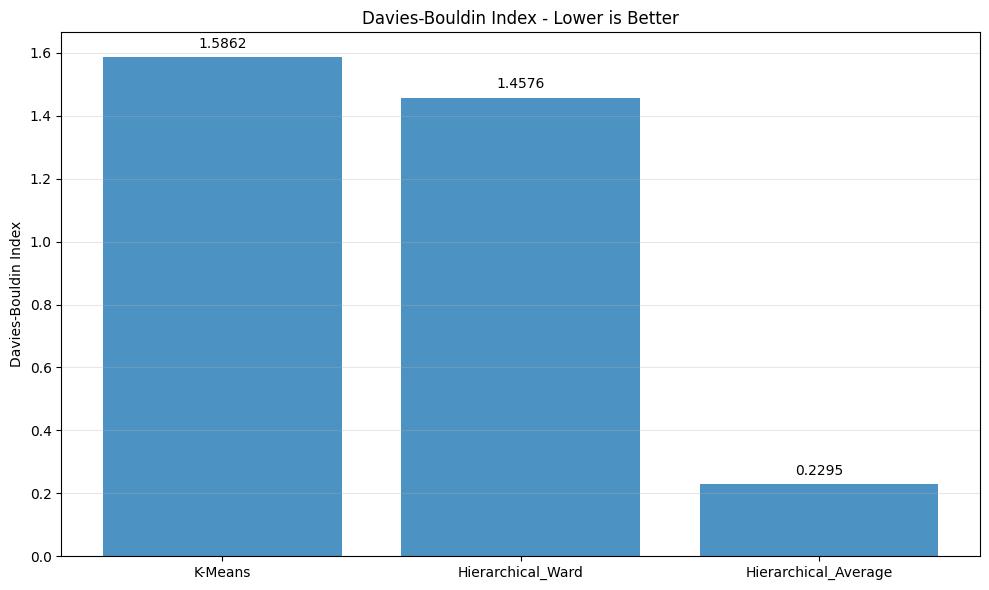

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_df["Algorithm"], metrics_df["Davies_Bouldin"], alpha=0.8)
plt.title("Davies-Bouldin Index - Lower is Better")
plt.ylabel("Davies-Bouldin Index")
plt.grid(axis="y", alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.02,
        f"{height:.4f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

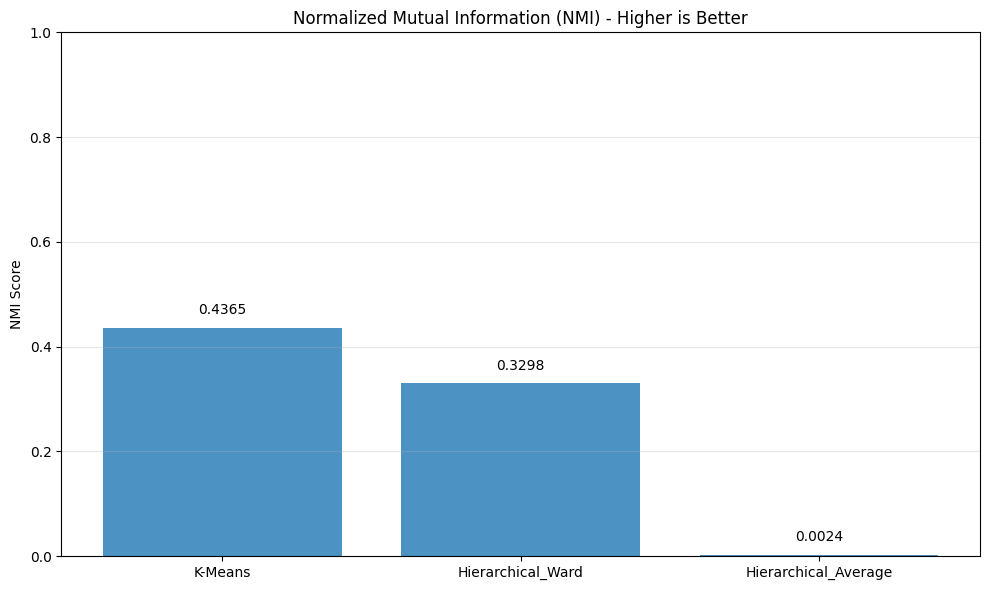

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_df["Algorithm"], metrics_df["NMI"], alpha=0.8)
plt.title("Normalized Mutual Information (NMI) - Higher is Better")
plt.ylabel("NMI Score")
plt.ylim(0, 1)
plt.grid(axis="y", alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.02,
        f"{height:.4f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

In [ ]:
ranking_df = metrics_df[["Algorithm"]].copy()

ranking_df["ARI_Rank"] = metrics_df["ARI"].rank(ascending=False)
ranking_df["Silhouette_Rank"] = metrics_df["Silhouette"].rank(ascending=False)
ranking_df["NMI_Rank"] = metrics_df["NMI"].rank(ascending=False)

ranking_df["DB_Rank"] = metrics_df["Davies_Bouldin"].rank(ascending=True)

ranking_df["Average_Rank"] = ranking_df[
    ["ARI_Rank", "Silhouette_Rank", "NMI_Rank", "DB_Rank"]
].mean(axis=1)

# Sort by average rank
ranking_df = ranking_df.sort_values("Average_Rank")
ranking_df



,Algorithm,ARI_Rank,Silhouette_Rank,NMI_Rank,DB_Rank,Average_Rank
0,K-Means,1.0,2.0,1.0,3.0,1.75
2,Hierarchical_Average,3.0,1.0,3.0,1.0,2.00
1,Hierarchical_Ward,2.0,3.0,2.0,2.0,2.25


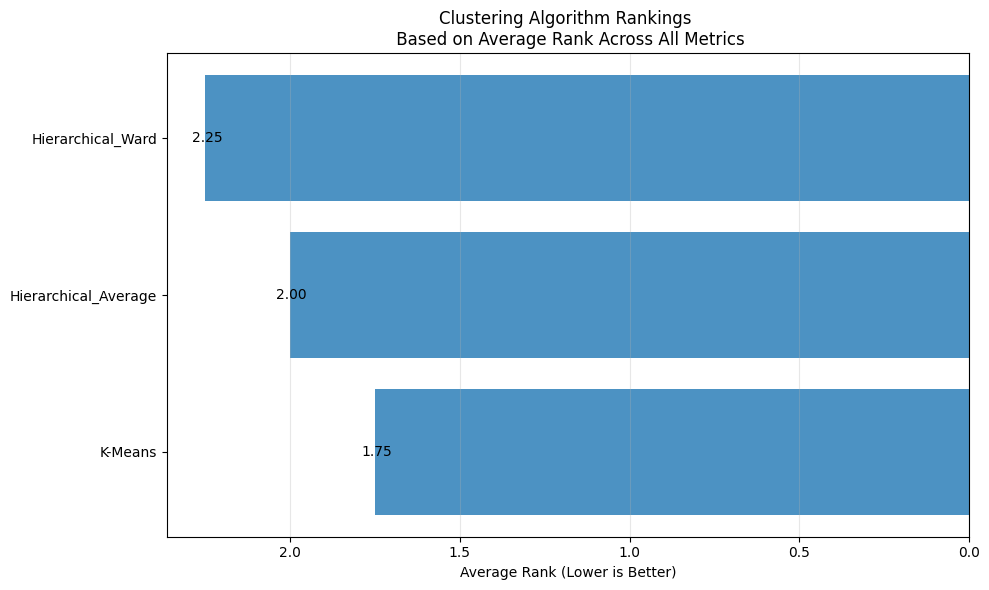

In [8]:
# Visualize average ranking
plt.figure(figsize=(10, 6))
bars = plt.barh(ranking_df["Algorithm"], ranking_df["Average_Rank"], alpha=0.8)
plt.xlabel("Average Rank (Lower is Better)")
plt.title("Clustering Algorithm Rankings \n Based on Average Rank Across All Metrics")
plt.gca().invert_xaxis()  
plt.grid(axis="x", alpha=0.3)

# Add rank values
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width - 0.05, bar.get_y() + bar.get_height()/2.,
             f'{width:.2f}', ha='right', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# so kmeans is better